In [2]:
pwd

'/Users/mac/Documents/dennis project'

In [3]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# importing the training and test dataset

In [104]:
df_train = pd.read_csv('train.csv',encoding= 'unicode_escape')
df_train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

In [5]:
pwd

'/Users/mac/Documents/dennis project'

In [105]:
df_test = pd.read_csv('test (1).csv',encoding= 'unicode_escape')
df_test.head()

textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            105.0  
2             18.0  
3            164.0  
4             26.0

# Merging the train and test dataset

In [106]:
frames = [df_train, df_test]

df = pd.concat(frames)
df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan        38928346.0         652860.0             60.0  
1      Albania         2877797.0          27400.0            105.0  
2      Algeria        43851044.0        2381740.0             18.0  
3      Andorra           77265.0            470.0            164.0  
4       Angola        32866272.0        1246700.0             26.0

# Data cleaning

In [107]:
# information on the dataset
print(df.shape)



(32296, 10)


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32296 entries, 0 to 4814
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [109]:
# checking for missing values
df.isnull().sum()

textID              1281
text                1282
selected_text       4816
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [110]:
# dropping columns because of misssing values and it is not a usefull features
df.drop(['selected_text','textID','Time of Tweet','Age of User','Country','Population -2020','Land Area (Km²)','Density (P/Km²)'],axis=1, inplace=True)
df.head()

text sentiment
0                I`d have responded, if I were going   neutral
1      Sooo SAD I will miss you here in San Diego!!!  negative
2                          my boss is bullying me...  negative
3                     what interview! leave me alone  negative
4   Sons of ****, why couldn`t they put them on t...  negative

In [111]:
# dropping missing rows
df=df.dropna()
print(df.shape)
print(df.isnull().sum())

(31014, 2)
text         0
sentiment    0
dtype: int64


In [112]:
df.describe().T

count unique                                   top   freq
text       31014  31014   I`d have responded, if I were going      1
sentiment  31014      3                               neutral  12547

In [113]:
#sentiment count: 
df['sentiment'].value_counts()

neutral     12547
positive     9685
negative     8782
Name: sentiment, dtype: int64

# EDA and DATA PREPROCESSING

<AxesSubplot:xlabel='sentiment', ylabel='count'>

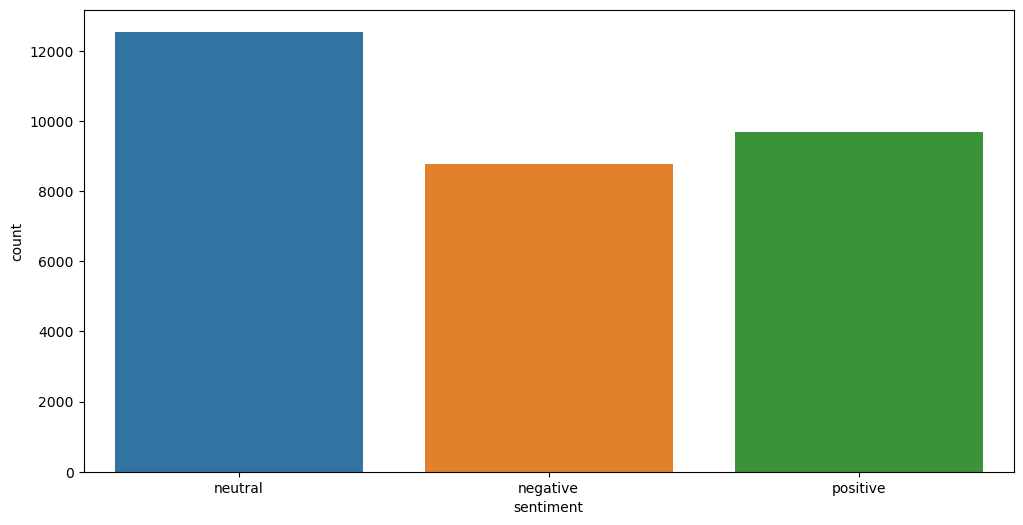

In [95]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [18]:
# function for the test processing
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)
    text = re.sub('<.*?>+', '', text) # removing special characters, 


    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [20]:
def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower() # converting to lowercase
    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links
    text = re.sub(r"\b\d+\b", "", text) # removing number 
    text = re.sub('<.*?>+', '', text) # removing special characters, 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # punctuations
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)
   
    #removing emoji: 
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   

   # removing short form: 
    
    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)
    text=re.sub("she´s",'she is',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('I’m','I am',text)
    text=re.sub('I’d','I did',text)
    text=re.sub("he’s'",'he is',text)
    text=re.sub('there’s','there is',text)
    
     
    return text
    

In [114]:
#Filtering the text

tweets_df = df.copy()

def preprocessor(text):
    #text = re.sub('[http:,https:]','',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.strip()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([word for word in text.split() if word.isalnum()])
    text = ' '.join([WordNetLemmatizer().lemmatize(word,pos='v') for word in text.split()])    
    #text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    #text = ' '.join([word for word in text.split() if len(word)>3])
    return text

In [124]:
tweets_df['text'] = df['text'].apply(preprocessor)


tweets_df.head()

text sentiment
0                    respond go   neutral
1       sooo sad miss san diego  negative
2                    boss bully  negative
3         interview leave alone  negative
4  sons put release already buy  negative

In [125]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=tokenizer_porter,use_idf=True,norm='l2',smooth_idf=True)
label=tweets_df.sentiment.values
features=tfidf.fit_transform(tweets_df.text)

In [129]:
label

array(['neutral', 'negative', 'negative', ..., 'negative', 'positive',
       'positive'], dtype=object)

In [21]:
df['processed_text'] = df['text'].apply(cleaning)
df.head()

text sentiment  \
0                I`d have responded, if I were going   neutral   
1      Sooo SAD I will miss you here in San Diego!!!  negative   
2                          my boss is bullying me...  negative   
3                     what interview! leave me alone  negative   
4   Sons of ****, why couldn`t they put them on t...  negative   

                                      processed_text  
0                  id have responded if i were going  
1         sooo sad i will miss you here in san diego  
2                             my boss is bullying me  
3                      what interview leave me alone  
4   sons of  why couldnt they put them on the rel...

In [98]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [100]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

In [102]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


In [24]:
stop_words = stopwords.words()
# remove stop word: 
df['stop_word_removed'] = df['processed_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

text sentiment  \
0                I`d have responded, if I were going   neutral   
1      Sooo SAD I will miss you here in San Diego!!!  negative   
2                          my boss is bullying me...  negative   
3                     what interview! leave me alone  negative   
4   Sons of ****, why couldn`t they put them on t...  negative   

                                      processed_text        stop_word_removed  
0                  id have responded if i were going             id responded  
1         sooo sad i will miss you here in san diego  sooo sad miss san diego  
2                             my boss is bullying me            boss bullying  
3                      what interview leave me alone          interview leave  
4   sons of  why couldnt they put them on the rel...      put releases bought

# Perform a word frequency analysis on the text data to see which words are most common in the dataset
## N-gram (the 20 most present bi-grams )

In [25]:
from nltk import corpus    
from sklearn.feature_extraction.text import CountVectorizer
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [89]:
def n_gram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = n_gram(df['stop_word_removed'], 20)

common_words
    

[('mothers day', 693),
 ('happy mothers', 503),
 ('star wars', 94),
 ('star trek', 89),
 ('wars day', 80),
 ('happy birthday', 70),
 ('happy star', 63),
 ('day moms', 61),
 ('bank holiday', 60),
 ('sorry hear', 58),
 ('great day', 58),
 ('day today', 57),
 ('ice cream', 51),
 ('day mothers', 50),
 ('work tomorrow', 49),
 ('gonna miss', 43),
 ('work today', 42),
 ('friday night', 40),
 ('great time', 37),
 ('hope great', 37)]

In [103]:
df2 = pd.DataFrame(common_words, columns=['bi_grams','count'])
df2.groupby('bi_grams').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count',
    linecolor='black',
    title='Top 20 bigrams of review words')

In [87]:
df2.head()

bi_grams  count
0    mothers day    693
1  happy mothers    503
2      star wars     94
3      star trek     89
4       wars day     80

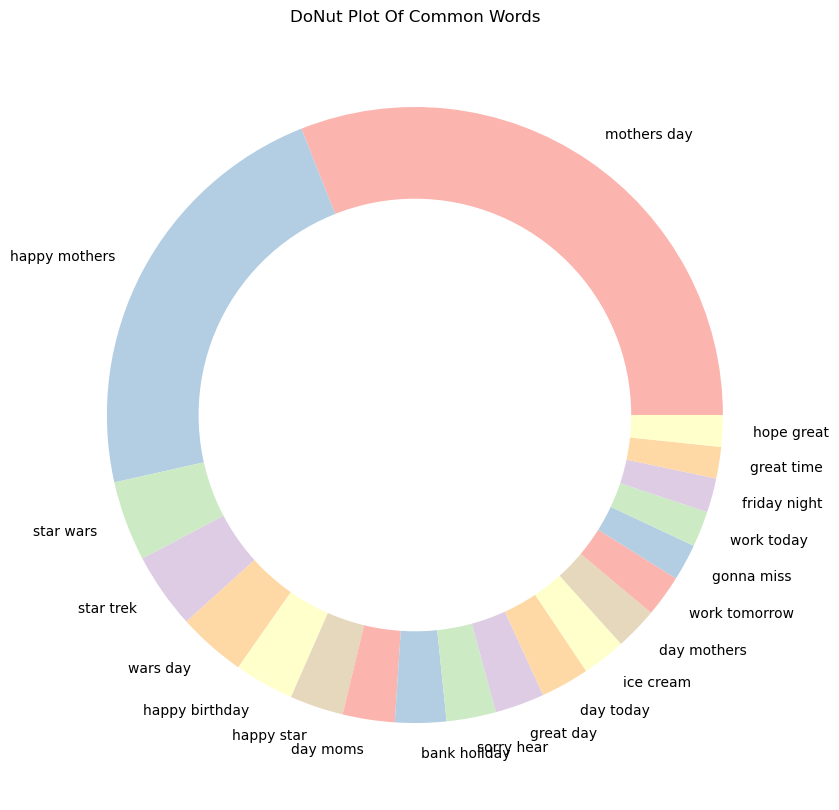

In [86]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(df2['count'], labels=df2.bi_grams, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Common Words')
plt.show()

In [78]:
pip install palettable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 196.5 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


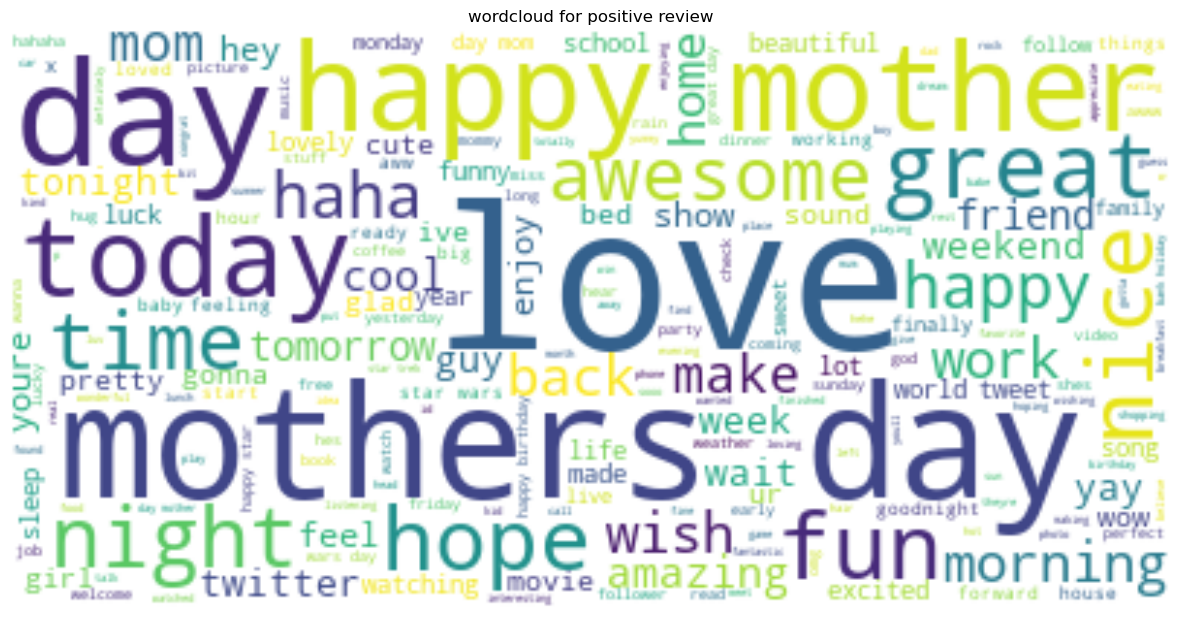

In [30]:
# word cloud for positive text
text = " ".join(i for i in df[df['sentiment']=='positive']['stop_word_removed'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

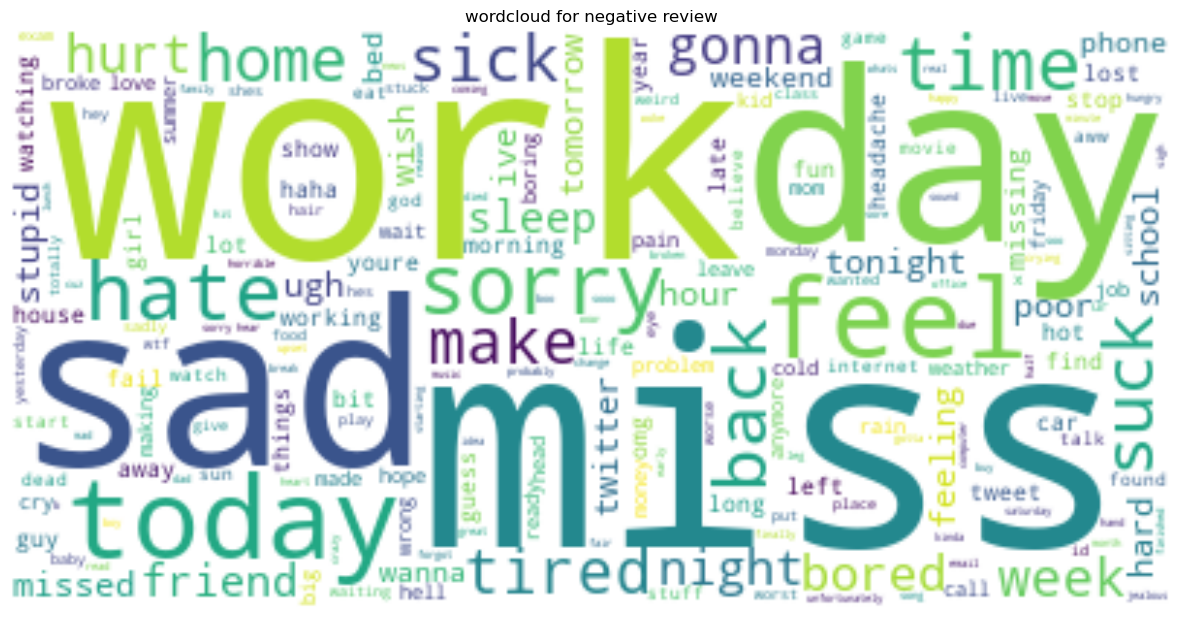

In [31]:
text = " ".join(i for i in df[df['sentiment']=='negative']['stop_word_removed'])
wordcloud = WordCloud( background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

# Naive_bayes Modelling!

## Tokenization

In [32]:
df.head()

text sentiment  \
0                I`d have responded, if I were going   neutral   
1      Sooo SAD I will miss you here in San Diego!!!  negative   
2                          my boss is bullying me...  negative   
3                     what interview! leave me alone  negative   
4   Sons of ****, why couldn`t they put them on t...  negative   

                                      processed_text        stop_word_removed  
0                  id have responded if i were going             id responded  
1         sooo sad i will miss you here in san diego  sooo sad miss san diego  
2                             my boss is bullying me            boss bullying  
3                      what interview leave me alone          interview leave  
4   sons of  why couldnt they put them on the rel...      put releases bought

In [33]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/mac/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
wordnet_lem = WordNetLemmatizer()

df['wo_stopfreq_lem'] = df['stop_word_removed'].apply(wordnet_lem.lemmatize)
df.head()

text sentiment  \
0                I`d have responded, if I were going   neutral   
1      Sooo SAD I will miss you here in San Diego!!!  negative   
2                          my boss is bullying me...  negative   
3                     what interview! leave me alone  negative   
4   Sons of ****, why couldn`t they put them on t...  negative   

                                      processed_text        stop_word_removed  \
0                  id have responded if i were going             id responded   
1         sooo sad i will miss you here in san diego  sooo sad miss san diego   
2                             my boss is bullying me            boss bullying   
3                      what interview leave me alone          interview leave   
4   sons of  why couldnt they put them on the rel...      put releases bought   

           wo_stopfreq_lem  
0             id responded  
1  sooo sad miss san diego  
2            boss bullying  
3          interview leave  
4      put releases bought

In [37]:
# create the cleaned data for the train-test split:
new_df=df.drop(columns=['text','processed_text','stop_word_removed'])
new_df.columns=['sentiment','review']

In [38]:
new_df.head()

sentiment                   review
0   neutral             id responded
1  negative  sooo sad miss san diego
2  negative            boss bullying
3  negative          interview leave
4  negative      put releases bought

In [39]:
# changing the categorical variable to numerical variables
new_df['sentiment'].replace(['negative', 'neutral','positive'],
                        [0, 1, 2], inplace=True)

In [40]:
new_df.head()

sentiment                   review
0          1             id responded
1          0  sooo sad miss san diego
2          0            boss bullying
3          0          interview leave
4          0      put releases bought

In [41]:
tokenized_review=new_df['review'].apply(lambda x: x.split())
tokenized_review.head(5)

0                  [id, responded]
1    [sooo, sad, miss, san, diego]
2                 [boss, bullying]
3               [interview, leave]
4          [put, releases, bought]
Name: review, dtype: object

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(new_df['review'])

In [130]:
# Assigning labels to target variable

label_mapping={'negative':0, 'neutral':1, 'positive':2}
tweets_df['sentiment'] = tweets_df['sentiment'].map(label_mapping)

# Train-test Split

In [131]:
from sklearn.model_selection import train_test_split
X=features
y=pd.Series(label).map(label_mapping)


In [132]:
y

0        1
1        0
2        0
3        0
4        0
        ..
31009    0
31010    2
31011    0
31012    2
31013    2
Length: 31014, dtype: int64

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [134]:
X_test.shape

(6203, 20796)

# Hyperparameter 
- Grid SEARCHCV

In [45]:
param_grid = {
   
    'alpha': [1, 1e-1, 1e-2],
    'fit_prior':[True, False]
}



In [46]:
from sklearn.naive_bayes import MultinomialNB


In [47]:
MNB = MultinomialNB()

In [48]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(MNB, param_grid, scoring='accuracy')


In [49]:
grid_search.fit(X_train, y_train)


GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 0.1, 0.01], 'fit_prior': [True, False]},
             scoring='accuracy')

In [50]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'alpha': 1, 'fit_prior': True}


In [51]:
best_estimator = grid_search.best_estimator_
print("Best estimator:", best_estimator)

Best estimator: MultinomialNB(alpha=1)


In [52]:
accuracy = best_estimator.score(X_test, y_test)
print("Accuracy on test set:", accuracy)

Accuracy on test set: 0.6100274060938256


# Naive_bayes modeling

### Training of different Naives Bayes Model such as ComplementNB, MultinatinominalNB, BernoulliNB and evaluate the performance of the models

## Complement NB model


In [53]:
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
CNB = ComplementNB()
CNB.fit(X_train, y_train)

from sklearn import metrics
predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 58.68%
------------------------------------------------
Confusion Matrix:
      0     1     2
0  1234   359   184
1   803  1061   660
2   220   337  1345
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61      1777
           1       0.60      0.42      0.50      2524
           2       0.61      0.71      0.66      1902

    accuracy                           0.59      6203
   macro avg       0.59      0.61      0.59      6203
weighted avg       0.59      0.59      0.58      6203



In [137]:
# Building Naive Bayes Classifier
from sklearn.metrics import classification_report, confusion_matrix
NB_model = BernoulliNB()
NB_model.fit(X_train,y_train)
pred = NB_model.predict(X_test)
accuracy_score = metrics.accuracy_score(pred, y_test)

print('NB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, pred)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, pred))

NB model accuracy is 64.18%
------------------------------------------------
Confusion Matrix:
     0     1     2
0  833   820    74
1  283  1921   283
2   77   685  1227
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.48      0.57      1727
           1       0.56      0.77      0.65      2487
           2       0.77      0.62      0.69      1989

    accuracy                           0.64      6203
   macro avg       0.68      0.62      0.64      6203
weighted avg       0.67      0.64      0.64      6203



## Accuracy score: is 64% for the BernoulliNB model.

# Insights 

- Accuracy score: is 59.05% for the complementNB model. for each of 100 total number of prediction, in average, our model can predict 59 cases correctly
- the model performance is low so we will train with another model

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

MNB = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 61.00%
------------------------------------------------
Confusion Matrix:
      0     1     2
0  1010   633   134
1   445  1591   488
2   110   609  1183
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.57      0.60      1777
           1       0.56      0.63      0.59      2524
           2       0.66      0.62      0.64      1902

    accuracy                           0.61      6203
   macro avg       0.62      0.61      0.61      6203
weighted avg       0.61      0.61      0.61      6203



# Insights

- The model is given a 61% accuracy score


In [55]:
from sklearn.naive_bayes import BernoulliNB

BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 58.71%
------------------------------------------------
Confusion Matrix:
     0     1    2
0  677  1016   84
1  225  2021  278
2   62   896  944
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.38      0.49      1777
           1       0.51      0.80      0.63      2524
           2       0.72      0.50      0.59      1902

    accuracy                           0.59      6203
   macro avg       0.65      0.56      0.57      6203
weighted avg       0.63      0.59      0.58      6203



In [56]:
# testing on unseen data
print(MNB.predict(cv.transform(['it sucks to be in a ill state'])))

[0]


# resample the data with imblearn over_sampling to train the model better

In [57]:
new_df['review']

0                                            id responded
1                                 sooo sad miss san diego
2                                           boss bullying
3                                         interview leave
4                                     put releases bought
                              ...                        
3529                                          tired sleep
3530    house net alive kicking invented net wanna kis...
3531           sinking depression move someplace tropical
3532                sutra youtube video gonna love videos
3533                               omgssh ang cute ng bby
Name: review, Length: 31014, dtype: object

In [58]:
from sklearn.model_selection import train_test_split

X = new_df.review
y = new_df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train.head()

22588                                    followfriday half
12552                                                 miss
25570                                    set phone twitter
22956                              hehe smiling gotta make
24379    cycle quarry shipley glen baildon moor heading...
Name: review, dtype: object

In [60]:
y_train.head()

22588    2
12552    0
25570    1
22956    2
24379    1
Name: sentiment, dtype: int64

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(max_features=1000, binary=True)

X_train_vect = vect.fit_transform(X_train)

In [62]:
X_train_vect.shape

(24811, 1000)

In [63]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_res, y_train_res = sm.fit_resample(X_train_vect, y_train)

In [64]:
y_train.shape

(24811,)

In [65]:
import numpy as np
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[(0, 10045), (1, 10045), (2, 10045)]


In [66]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_res, y_train_res)

nb.score(X_train_res, y_train_res)

X_test_vect = vect.transform(X_test)

predict = nb.predict(X_test_vect)
accuracy_score = metrics.accuracy_score(predict,y_test)

print('MultinomialNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predict)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predict))

MultinomialNB model accuracy = 58.70%
------------------------------------------------
Confusion Matrix:
      0     1     2
0  1161   471   117
1   779  1289   434
2   265   496  1191
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.66      0.59      1749
           1       0.57      0.52      0.54      2502
           2       0.68      0.61      0.64      1952

    accuracy                           0.59      6203
   macro avg       0.59      0.60      0.59      6203
weighted avg       0.59      0.59      0.59      6203



# Inslight
- MultinomialNB has an accuracy score of 61%

# PREDICTION ON THE MODEL
- We will be using MultinomialNB model since it gives the best accuracy score

# 0 is nagative
# 1 is neural
# 2 is positive

In [67]:
print(nb.predict(vect.transform(['this is a bad product'])))

[0]


In [68]:
print(nb.predict(vect.transform(['I recently dined at Dennis Restaurant and was thoroughly impressed by both the exquisite cuisine and the impeccable service.'])))

[0]


In [69]:
print(nb.predict(vect.transform(['The attentive and knowledgeable staff ensured that our meal was a memorable one, providing excellent recommendations and ensuring our satisfaction.'])))

[2]


In [70]:
print(nb.predict(vect.transform(['today is going to be a very good day'])))

[2]


In [71]:
print(nb.predict(vect.transform(['The staff was great. The receptionists were very helpful and answered all our questions.'])))

[2]


In [72]:
print(nb.predict(vect.transform(['The room was clean and bright, and the room service was always on time. Will be coming back! Thank you so much.'])))

[1]


In [73]:
print(nb.predict(vect.transform(['My husband and I went for dinner in restaurant X and really enjoyed the atmosphere. The food was fresh and delicious, and the best part was that the chef sent us a dessert they had created that day. We were delighted.'])))

[2]


# Inslight
- The model is performing very well with the perdiction of new text

# LogisticRegression

In [74]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_res, y_train_res)
ypred=model1.score(X_train_res, y_train_res)
ypred

/Users/mac/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.663381450141032

# logisticRegression prediction

In [75]:
print(model1.predict(vect.transform(['it sucks to be in a ill state'])))

[0]


In [76]:
print(nb.predict(vect.transform(['today is going to be a very good day'])))

[2]
